In [1]:
import pickle
import matplotlib.pyplot as plt

In [2]:
with open("aggregated_bmrd_ids.txt", "r") as infile:
        filtered_IDs = infile.read().replace("\n","").split(",")
        filtered_IDs = set([int(bmrb_id) for bmrb_id in filtered_IDs])


In [3]:
len(filtered_IDs)

4752

In [4]:
with open("chemical_shifts.pkl", "rb") as infile:
        chemical_shifts = pickle.load(infile)
        bmrb_ids = set(list(chemical_shifts))

In [5]:
filtered_chemical_shifts = list(filtered_IDs.intersection(bmrb_ids))

In [6]:
len(filtered_chemical_shifts)

4752

# H-Shifts

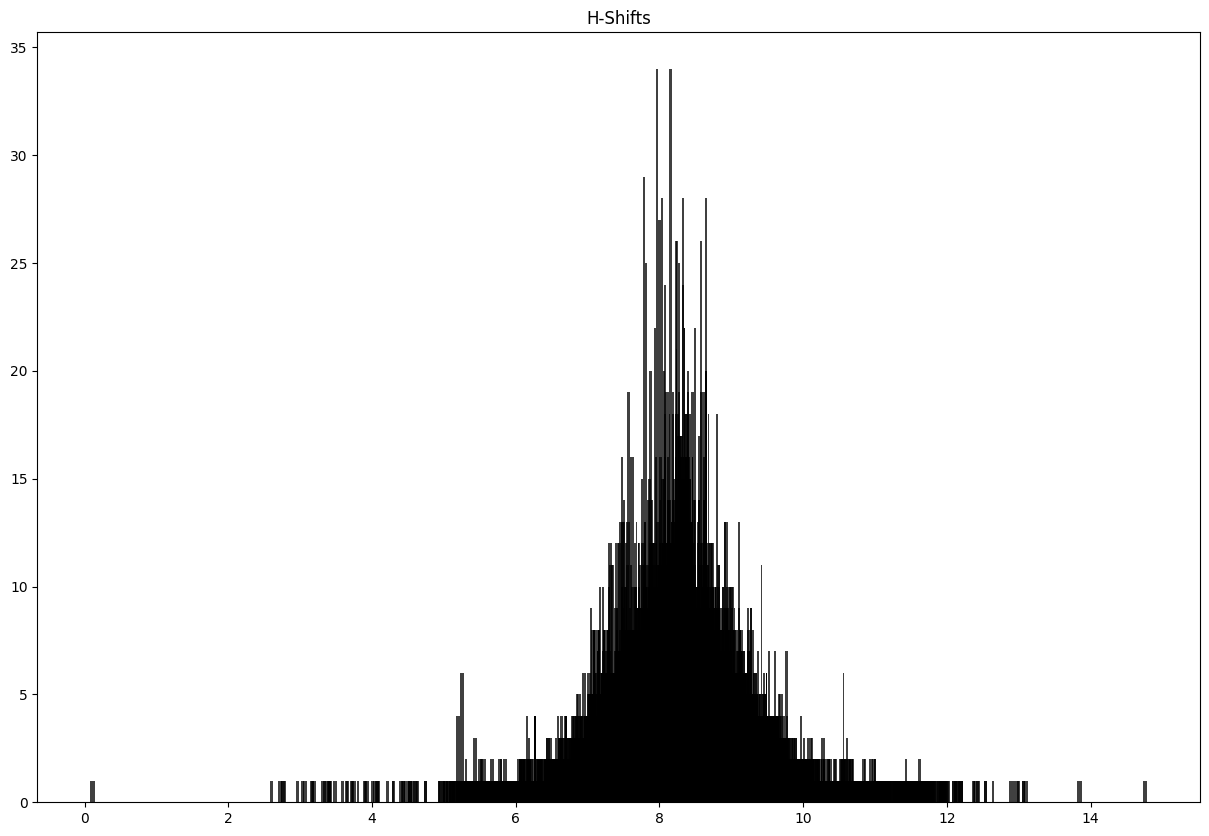

In [7]:
plt.figure(figsize=(15,10))
for bmrb_id in filtered_chemical_shifts:
    plt.hist(chemical_shifts[bmrb_id].X_shift, 150, density=False, alpha=0.75, histtype="stepfilled", color="black")
plt.title("H-Shifts")
plt.show()

In [8]:
H_to_large_or_small = []
for bmrb_id in filtered_chemical_shifts:
    if max(chemical_shifts[bmrb_id].X_shift) > 11 or min(chemical_shifts[bmrb_id].X_shift) < 6:
        print(bmrb_id, ":", "max --> ",max(chemical_shifts[bmrb_id].X_shift), "min --> ", min(chemical_shifts[bmrb_id].X_shift))
        H_to_large_or_small.append(bmrb_id)

16384 : max -->  10.95 min -->  5.09
16404 : max -->  11.04 min -->  5.72
16426 : max -->  11.122 min -->  6.935
16428 : max -->  11.796 min -->  6.515
16439 : max -->  12.138 min -->  6.011
16441 : max -->  11.189 min -->  6.978
16466 : max -->  9.855 min -->  4.28
16476 : max -->  9.801 min -->  3.335
16490 : max -->  9.219 min -->  5.443
16507 : max -->  11.192 min -->  6.909
16545 : max -->  9.514 min -->  5.613
16558 : max -->  10.151 min -->  5.169
16561 : max -->  10.741 min -->  4.418
16578 : max -->  10.336 min -->  5.295
16607 : max -->  10.039 min -->  5.29
16629 : max -->  11.534 min -->  6.786
16632 : max -->  11.119 min -->  6.623
16675 : max -->  11.293 min -->  5.633
16686 : max -->  9.548 min -->  5.957
16692 : max -->  9.15 min -->  5.937
16738 : max -->  10.793 min -->  5.536
16795 : max -->  11.2 min -->  6.57
16807 : max -->  10.273 min -->  5.269
16811 : max -->  10.25 min -->  5.81
16833 : max -->  11.733 min -->  6.101
25026 : max -->  11.187 min -->  6.9
16842 

In [9]:
keys = filtered_chemical_shifts.copy()

In [10]:
len(keys)

4752

In [11]:
for bmrb_id in H_to_large_or_small:
    keys.remove(bmrb_id)

# N-Shifts

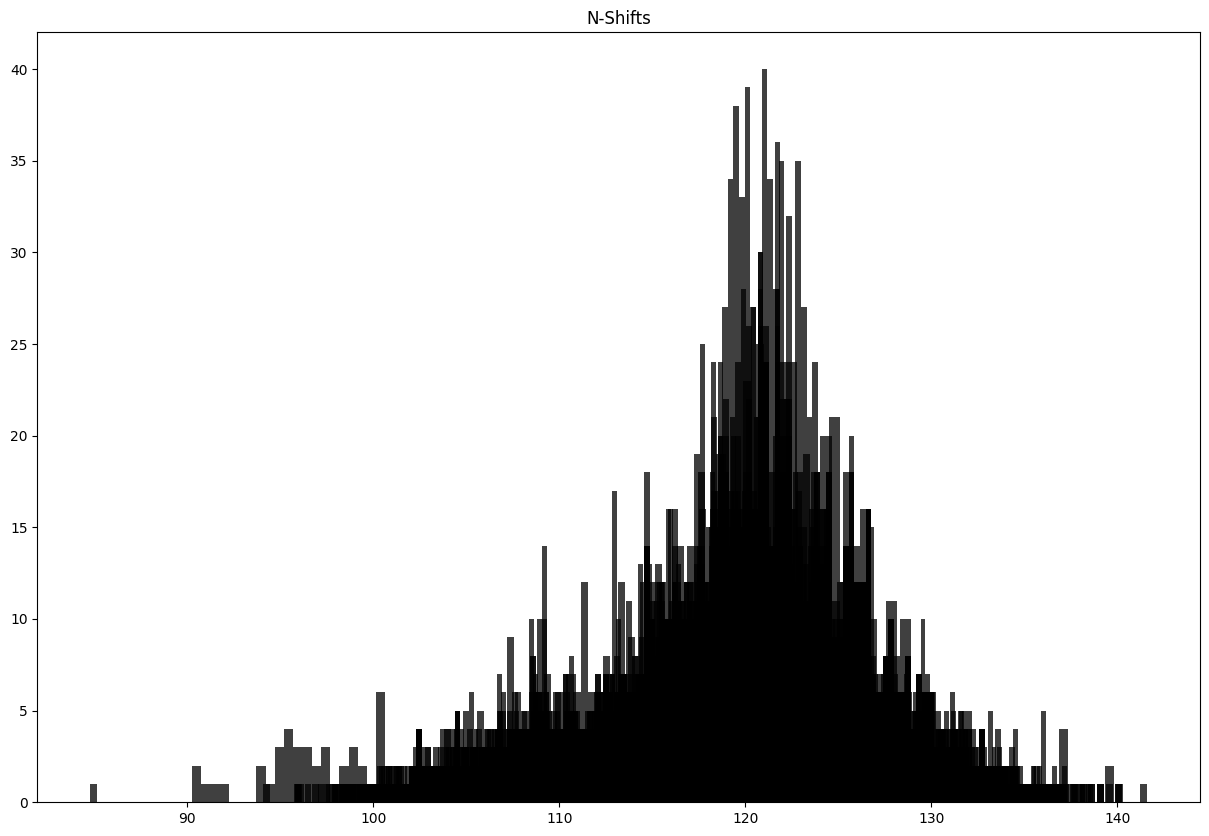

In [12]:
plt.figure(figsize=(15,10))
for bmrb_id in filtered_chemical_shifts:
    plt.hist(chemical_shifts[bmrb_id].Y_shift, 100, density=False, alpha=0.75, histtype="stepfilled", color="black")
plt.title("N-Shifts")
plt.show()

In [13]:
N_to_large_or_small = []
for bmrb_id in filtered_chemical_shifts:
    if max(chemical_shifts[bmrb_id].Y_shift) > 140 or min(chemical_shifts[bmrb_id].Y_shift) < 90:
        print(bmrb_id, ":", "max --> ",max(chemical_shifts[bmrb_id].Y_shift), "min --> ", min(chemical_shifts[bmrb_id].Y_shift))
        N_to_large_or_small.append(bmrb_id)

11208 : max -->  141.606 min -->  104.528
5060 : max -->  140.3 min -->  105.1
30639 : max -->  140.273 min -->  101.936
30640 : max -->  140.273 min -->  101.936
30921 : max -->  123.749 min -->  84.773


In [14]:
for bmrb_id in N_to_large_or_small:
    if bmrb_id not in H_to_large_or_small:
        print(bmrb_id)
        keys.remove(bmrb_id)

11208
5060
30639
30640
30921


In [15]:
len(keys)

4087

In [16]:
with open("all_with_filtered_by_shifts_constraints.txt", "w") as outfile:
    outfile.writelines(",".join(map(str, keys)))